# Data and AI Assignment 3
![UCLL logo](https://cdn.discordapp.com/attachments/1025724154852417549/1033683765530218506/unknown.png)

Group
- Astrid Piot
- Catarina Rilho
- Catarina Afonso
- Cristina Marques
- Greg François Reynders
- Robbe Van de Velde
- Rocío Pérez Holgado
- Seppe Haems

## Data understanding
---

The business people have heard our requests and have updated the data dictionaries:

### Describe the data

##### Assessments

*This file contains information about assessments in module-presentations. Usually, every presentation has a number of assessments followed by the final exam.*

|variable                       |class          |description                    |notes                        |
|:------------------------------|:--------------|:------------------------------|:----------------------------|
|code_module                    |character      |identification code of the module||
|code_presentation              |character      |identification code of the presentation||
|id_assessment                  |number         |identification number of the assessment||
|assessment_type                |character      |type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam)||
|date                           |number         | information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).|If the information about the final exam date is missing, it is at the end of the last presentation week.|
|weight                         |double     |weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%||

##### Courses

*File contains the list of all available modules and their presentations. The columns are:*

|variable                       |class          |description                    |notes                        |
|:------------------------------|:--------------|:------------------------------|:----------------------------|
|code_module                    |character      |code name of the module, which serves as the identifier||
|code_presentation              |character      |code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.||
|module_presentation_length     |number         |length of the module-presentation in days||

*The structure of B and J presentations may differ and therefore it is good practice to analyse the B and J presentations separately. Nevertheless, for some presentations the corresponding previous B/J presentation do not exist and therefore the J presentation must be used to inform the B presentation or vice versa. In the dataset this is the case of CCC, EEE and GGG modules.*

##### Student Assessment

*This file contains the results of students’ assessments. If the student does not submit the assessment, no result is recorded. The final exam submissions is missing, if the result of the assessments is not stored in the system. This file contains the following columns:*

|variable                       |class          |description                    |notes                        |
|:------------------------------|:--------------|:------------------------------|:----------------------------|
|id_assessment                  |number         |the identification number of the assessment||
|id_student                     |number         |a unique identification number for the student||
|date_submitted                 |number         |the date of student submission, measured as the number of days since the start of the module presentation.||
|is_banked                      |boolean        |a status flag indicating that the assessment result has been transferred from a previous presentation.||
|score                          |double         |the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.||

##### Student Registration

*This file contains information about the time when the student registered for the module presentation. For students who unregistered the date of unregistration is also recorded. File contains five columns:*

|variable                       |class          |description                    |notes                        |
|:------------------------------|:--------------|:------------------------------|:----------------------------|
|code_module                    |character      |an identification code for a module||
|code_presentation              |character      |the identification code of the presentation||
|id_student                     |number         |a unique identification number for the student
|date_registration              |double         |the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).||
|date_unregistration            |double         |date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.||

##### Student Info

*This file contains demographic information about the students together with their results. File contains the following columns:*

|variable                       |class          |description                    |notes                        |
|:------------------------------|:--------------|:------------------------------|:----------------------------|
|code_module                    |character      |an identification code for a module||
|code_presentation              |character      |the identification code of the presentation||
|id_student                     |number         |a unique identification number for the student||
|gender                         |character      |the student’s gender||
|region                         |character      |identifies the geographic region, where the student lived while taking the module-presentation.||
|highest_education              |character      |highest student education level on entry to the module presentation||
|imd_band                       |range (%)      |specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation||
|age_band                       |range (number) |band of the student’s age
|num_of_prev_attempts           |number         |the number times the student has attempted this module||
|studied_credits                |number         |the total number of credits for the modules the student is currently studying||
|disability                     |character      |indicates whether the student has declared a disability|(Y/N)|
|final_result                   |character      |student’s final result in the module-presentation||

##### Student VLE

*The studentVle.csv file contains information about each student’s interactions with the materials in the VLE (Virtual Learning Environment). This file contains the following columns:*

|variable                       |class          |description                    |notes                        |
|:------------------------------|:--------------|:------------------------------|:----------------------------|
|code_module                    |character      |an identification code for a module||
|code_presentation              |character      |the identification code of the presentation||
|id_student                     |number         |a unique identification number for the student||
|id_site                        |number         |an identification number for the VLE material||
|date                           |number         | the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.||
sum_click                       |number         |the number of times a student interacts with the material on that date||

##### VLE

*The csv file contains information about the available materials in the VLE. Typically these are html pages, pdf files, etc. Students have access to these materials online and their interactions with the materials are recorded. The vle.csv file contains the following columns:*

|variable                       |class          |description                    |notes                        |
|:------------------------------|:--------------|:------------------------------|:----------------------------|
|id_site                        |number         |an identification number of the material.||
|code_module                    |character      |an identification code for a module||
|code_presentation              |character      |the identification code of the presentation||
|id_site                        |number         |an identification number for the VLE material||
|activity_type                  |character      |the role associated with the module material||
|week_from                      |number         |the week from which the material is planned to be used||
|week_to                        |number         |week until which the material is planned to be used||

### 3) Explore the data

#### Load in the data

In [78]:
# Load in the python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import scikit_posthocs as sp
pd.options.display.float_format = '{:,.2f}'.format

In [79]:
# Create the data frames
assessments_df = pd.read_csv('data/assessments.csv')
courses_df = pd.read_csv('data/courses.csv')
student_assessment_df = pd.read_csv('data/studentAssessment.csv')
student_registration_df = pd.read_csv('data/studentRegistration.csv')
student_info_df = pd.read_csv('data/studentInfo.csv')
student_vle_df = pd.read_csv('data/studentVle.csv')
vle_df = pd.read_csv('data/vle.csv')

#### Verify data quality

##### Look at the first rows of every dataset

In [80]:
assessments_df.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,NaN,10.00
1,AAA,2013J,1753,TMA,NaN,20.00
2,AAA,2013J,1754,TMA,NaN,20.00
3,AAA,2013J,1755,TMA,NaN,20.00
4,AAA,2013J,1756,TMA,NaN,30.00


In [81]:
courses_df.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2113J,268
1,AAA,2014J,269
2,BBB,2113J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [82]:
student_assessment_df.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.00
1,1752,28400,22,0,70.00
2,1752,31604,17,0,72.00
3,1752,32885,26,0,69.00
4,1752,38053,19,0,79.00


In [83]:
student_registration_df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.00,NaN
1,AAA,2013J,28400,-53.00,NaN
2,AAA,2013J,30268,-92.00,12.00
3,AAA,2013J,31604,-52.00,NaN
4,AAA,2013J,32885,-176.00,NaN


In [84]:
student_info_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,NaN,NaN,28400,NaN,Scotland,NaN,20-30%,NaN,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [85]:
student_vle_df.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [86]:
vle_df.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


##### Missing values

In [87]:
assessments_df.isnull().sum()

code_module            0
code_presentation      0
id_assessment          0
assessment_type        0
date                 114
weight                 0
dtype: int64

Due to the weird format of the date, at this point in time we can't make a decision about what to do with these missing values. We won't drop them for now so that we don't lose the data.

In [88]:
courses_df.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [89]:
student_assessment_df.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

If the student does not submit the assessment, no result is recorded.

For now we are going to change the 173 null values of score to -1.

When we are going to analyze the scores (average, mean,...), we don't want to include these rows in the analysis.


In [90]:
# Replace NaN with -1 in the score column
student_assessment_df['score'].fillna(-1, inplace=True)

In [91]:
student_registration_df.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

It would be interesting to know why there are rows without registration date.

We won't remove them because they are not that many and would likely be because of an input mistake.

I will remove the registration date column but replace the unregistration date with a boolean "unregistered" so we can use this information later.

In [92]:
# Remove the date_registration column
student_registration_df.drop(columns=['date_registration'], inplace=True)

# Replace date_unregestration NaN with false and all the other values with true
student_registration_df['date_unregistration'] = student_registration_df['date_unregistration'].apply(lambda x: False if pd.isnull(x) else True)

# Rename the date_unregestration column to unregistered
student_registration_df.rename(columns={'date_unregistration': 'unregistered'}, inplace=True)

student_registration_df.head()


,code_module,code_presentation,id_student,unregistered
0,AAA,2013J,11391,False
1,AAA,2013J,28400,False
2,AAA,2013J,30268,True
3,AAA,2013J,31604,False
4,AAA,2013J,32885,False


In [93]:
student_info_df.isnull().sum()

code_module             3446
code_presentation       3446
id_student                 0
gender                  3446
region                     0
highest_education       3446
imd_band                1111
age_band                3446
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

This result is interesting because a same amount of null types appear.
Let's take a closer look at this.

In [94]:
student_info_df[student_info_df['code_module'].isnull()].sort_values("region")

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
1,NaN,NaN,28400,NaN,Scotland,NaN,20-30%,NaN,0,60,N,Pass
20449,NaN,NaN,237934,NaN,Scotland,NaN,80-90%,NaN,0,60,N,Fail
20458,NaN,NaN,267961,NaN,Scotland,NaN,90-100%,NaN,1,60,N,Fail
20459,NaN,NaN,272103,NaN,Scotland,NaN,30-40%,NaN,0,90,Y,Fail
20461,NaN,NaN,278786,NaN,Scotland,NaN,40-50%,NaN,1,135,N,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...
11116,NaN,NaN,507031,NaN,Scotland,NaN,90-100%,NaN,0,120,N,Withdrawn
11121,NaN,NaN,508637,NaN,Scotland,NaN,20-30%,NaN,0,60,N,Distinction
11126,NaN,NaN,509710,NaN,Scotland,NaN,10-20,NaN,0,30,N,Fail
11129,NaN,NaN,510266,NaN,Scotland,NaN,20-30%,NaN,0,60,N,Fail


Here it is weird that every region that has missing values is Scotland, let's see for sure that this is the case.

In [95]:
scottish_students = student_info_df[student_info_df['region'] == 'Scotland']
print("--- Scottish students ---")
print("Not null values for gender:", scottish_students['gender'].notnull().sum())
print("Not null values for Highest education:", scottish_students['highest_education'].notnull().sum())
print("Not null values for Age band:", scottish_students['age_band'].notnull().sum())

print("\n--- Non-Scottish students ---")
non_scottish_students = student_info_df[student_info_df['region'] != 'Scotland']

print("Not null values for gender:", non_scottish_students['gender'].notnull().sum())
print("Null values for gender:", non_scottish_students['gender'].isnull().sum())

print("Not null values for Highest education:", non_scottish_students['highest_education'].notnull().sum())
print("Null values for highest education:", non_scottish_students['highest_education'].isnull().sum())

--- Scottish students ---
Not null values for gender: 0
Not null values for Highest education: 0
Not null values for Age band: 0

--- Non-Scottish students ---
Not null values for gender: 29147
Null values for gender: 0
Not null values for Highest education: 29147
Null values for highest education: 0


We should not drop the rows with missing values. If we drop all the rows with missing values, we lose all the Scottish students.
We would lose the final result, imd band, disablity,... of all the Scottish students.

These missing values are probably a mistake, we need to point this out to the business. They can either explain why or fix the problem.

For now, we will replace the null values with "Unknown". After the business clarifies the issue, we can revisit the problem.



In [96]:
non_scottish_students.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1099
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

There are also some students with missing imd_band values that don't live in Scotland. 

Maybe this is because they don't want to share this information, but we don't know for sure. We should also ask for clarifaction to the business.

For now, we are going to change the null values to "Missing".

In [97]:
student_info_df = student_info_df.fillna(value={"code_module": "Unknown", "code_presentation": "Unknown", "gender": "Unknown", "highest_education": "Unknown", "age_band": "Unknown", "imd_band": "Missing"})
student_info_df.isnull().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [98]:
student_vle_df.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [99]:
vle_df.isnull().sum()


id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

5243 of the 6364 rows have missing week_from and week_to values. This probably has to do with the fact that the material is just always available or that they don't have a specific time planned for them.

We are going to leave it as null, because this seems intentional.

We should ask the business to clarify what these missing values mean.

##### Outliers

- Assessment Weight

Firstly, we are going to look at the weight of the assessments.

"Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%"

In [100]:
# Check that all the exams have a weight of 100%
assessments_df[assessments_df['assessment_type'] == 'Exam']['weight'].unique()

array([100.])

In [101]:
assessments_grouped = assessments_df[assessments_df["assessment_type"] != "Exam"].groupby(['code_presentation','code_module'])

assessments_grouped["weight"].sum()

code_presentation  code_module
2013B              BBB           100.00
                   DDD           100.00
                   FFF           100.00
2013J              AAA           100.00
                   BBB           100.00
                   DDD           100.00
                   EEE           100.00
                   FFF           100.00
                   GGG             0.00
2014B              BBB           100.00
                   CCC           100.00
                   DDD           100.00
                   EEE           100.00
                   FFF           100.00
                   GGG             0.00
2014J              AAA           100.00
                   BBB           100.00
                   CCC           100.00
                   DDD           100.00
                   EEE           100.00
                   FFF           100.00
                   GGG             0.00
Name: weight, dtype: float64

The sums of the weights seem to be correct, except for GGG where they are equal to 0.

We will look at the assessments for module GGG:

In [102]:
assessments_df.query('code_module == "GGG" and assessment_type != "Exam"').head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
176,GGG,2013J,37418,CMA,NaN,0.00
177,GGG,2013J,37419,CMA,NaN,0.00
178,GGG,2013J,37420,CMA,NaN,0.00
179,GGG,2013J,37421,CMA,NaN,0.00
180,GGG,2013J,37422,CMA,NaN,0.00


The GGG modules do have assessments, but they are all of weight 0.

There might also be other assessments with a weight of 0:

In [103]:
assessments_df[assessments_df["weight"] == 0].head(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
48,BBB,2014J,15020,TMA,19.00,0.00
124,FFF,2013B,34865,CMA,NaN,0.00
125,FFF,2013B,34866,CMA,NaN,0.00
126,FFF,2013B,34867,CMA,222.00,0.00
127,FFF,2013B,34868,CMA,NaN,0.00
128,FFF,2013B,34869,CMA,NaN,0.00
129,FFF,2013B,34871,CMA,NaN,0.00
130,FFF,2013B,34870,CMA,222.00,0.00
137,FFF,2013J,34878,CMA,NaN,0.00
138,FFF,2013J,34879,CMA,NaN,0.00


They might be practice assessments and don't have any influence on your final score.

We should ask the business to clarify.

Let's check if there are any values higher or lower than the normal values and look at the distribution of the weights per presentation

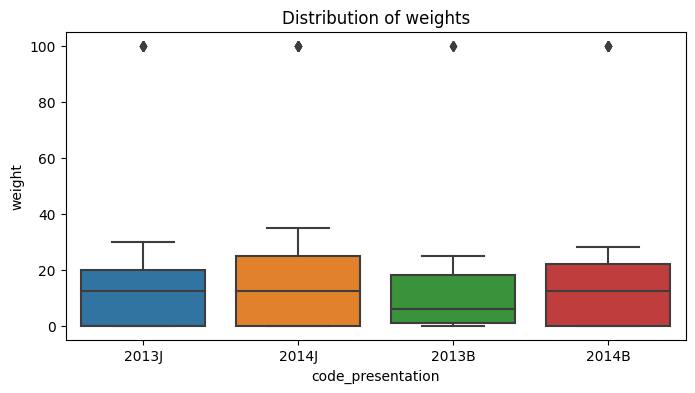

In [104]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("Distribution of weights")
sns.boxplot(data=assessments_df, x="code_presentation", y="weight", ax=ax);

There are no negative weights or weights higher than 100. This all seems to check out.

- Student assessment scores

Now we are going to take a look at the scores of student assessments (only the delivered ones). Are there any outliers?

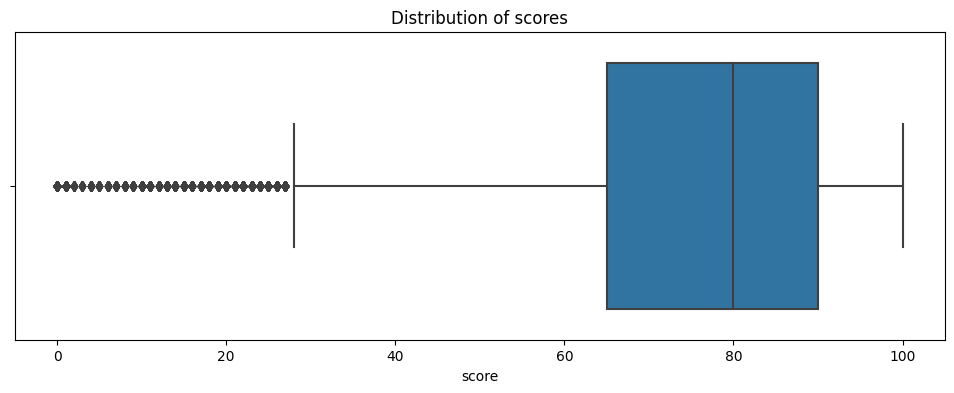

In [105]:
delivered_assessments = student_assessment_df[student_assessment_df["score"] >= 0]

fig, ax = plt.subplots(figsize=(12,4))
ax.set_title("Distribution of scores")
sns.boxplot(data=delivered_assessments, x="score", ax=ax);

In [106]:
delivered_assessments['score'].mean()

75.7995729226023

The scores look normal, and the outliers don't seem like a mistake.

- Studied Credits

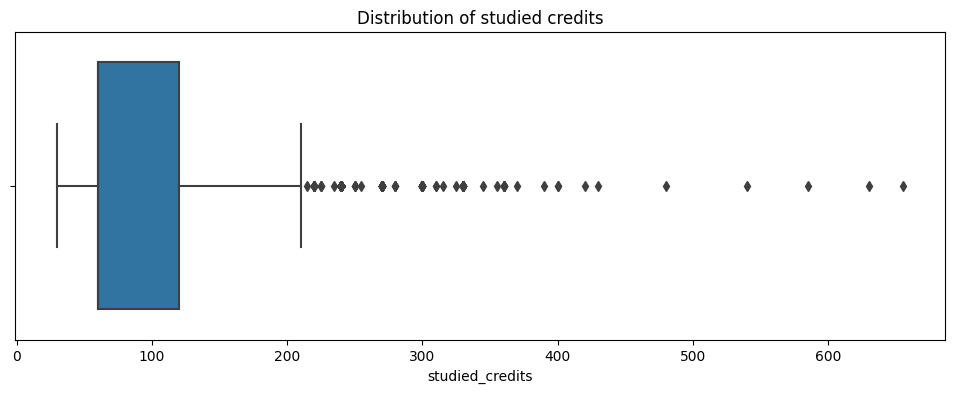

In [107]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title("Distribution of studied credits")
sns.boxplot(data=student_info_df, x="studied_credits", ax=ax);

In [108]:
student_info_df['studied_credits'].describe() 

count   32,593.00
mean        79.76
std         41.07
min         30.00
25%         60.00
50%         60.00
75%        120.00
max        655.00
Name: studied_credits, dtype: float64

There are outliers with very high studied_credits values. We would need further clarification to know if this is possible.

In [109]:
# Let's check the rows with studied_credits > 400
student_info_df[student_info_df['studied_credits'] > 400]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
57,AAA,2013J,155550,M,London Region,A Level or Equivalent,0-10%,35-55,0,420,N,Pass
865,BBB,2013B,230348,F,East Anglian Region,A Level or Equivalent,0-10%,0-35,2,585,N,Withdrawn
2778,BBB,2013J,363151,M,North Western Region,Lower Than A Level,10-20,35-55,0,655,Y,Withdrawn
10378,CCC,2014B,1474869,F,South Region,A Level or Equivalent,90-100%,35-55,0,630,Y,Pass
11315,CCC,2014J,556788,M,North Region,Lower Than A Level,Missing,35-55,1,480,N,Withdrawn
16424,DDD,2014B,244438,M,North Western Region,A Level or Equivalent,10-20,0-35,1,540,N,Withdrawn
27748,Unknown,Unknown,131597,Unknown,Scotland,Unknown,40-50%,Unknown,0,430,N,Pass


There doesn't seem to be any pattern in these rows

##### Explore student information

In [110]:
student_assessments_info = pd.merge(student_assessment_df, student_info_df, on=['id_student'], how='left')
student_assessments_info.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,1752,11391,18,0,78.00,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,1752,28400,22,0,70.00,Unknown,Unknown,Unknown,Scotland,Unknown,20-30%,Unknown,0,60,N,Pass
2,1752,31604,17,0,72.00,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
3,1752,32885,26,0,69.00,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
4,1752,38053,19,0,79.00,AAA,2013J,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass


- Gender

Are there any noticeable differences between male and female students?

Number of male students:  15836
Number of female students:  13311


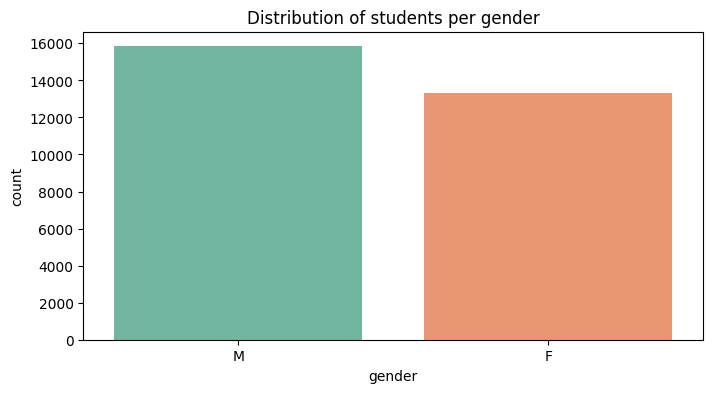

In [111]:
# How many female and male students are there?
print('Number of male students: ', student_info_df[student_info_df['gender'] == 'M'].shape[0])
print('Number of female students: ', student_info_df[student_info_df['gender'] == 'F'].shape[0])

fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("Distribution of students per gender")
sns.countplot(x="gender", data=student_info_df, order=['M', 'F'], ax=ax, palette="Set2");

In [112]:
# Average score per gender
gendered_scores = student_assessments_info[(student_assessments_info['gender'] != 'Unknown') & (student_assessments_info['score'] >= 0)]
gendered_scores.groupby('gender')['score'].mean()

gender
F   75.51
M   75.17
Name: score, dtype: float64

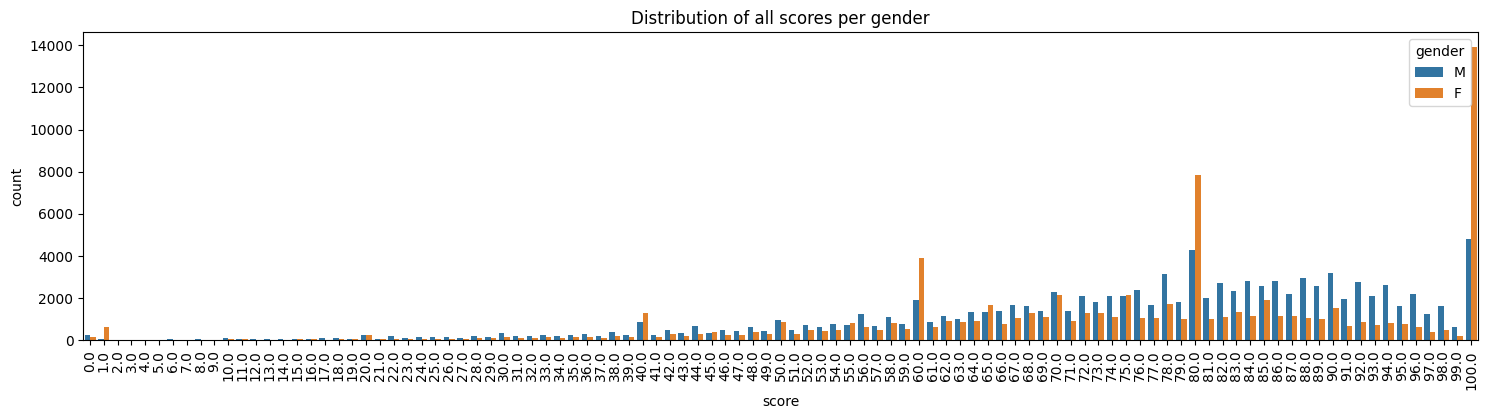

In [113]:
fig, ax = plt.subplots(figsize=(18,4))
ax.set_title("Distribution of all scores per gender")
sns.countplot(data=gendered_scores, x='score', hue='gender', ax=ax);
plt.xticks(rotation=90)
plt.show()

There is a 0.4 % difference between the female and male students' average scores, but the graph shows a weird distribution. In all of the scores, except at 1, 20, 40, 60, 80 and 100, there seem to be more females than males, but at those values there are considerably more females. We don't know if this is a mistake, or if female students are being evaluated differently than male students.

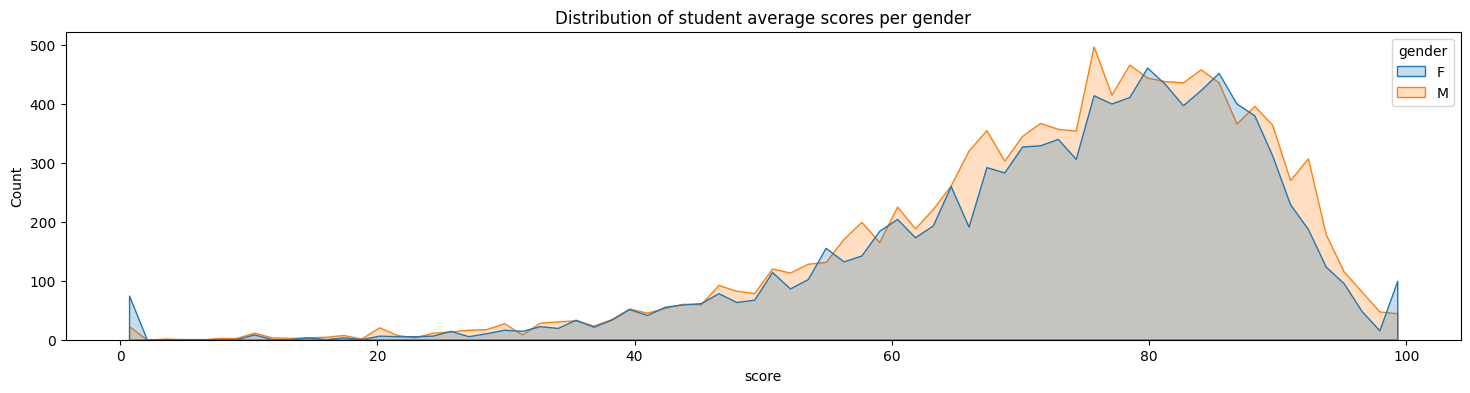

In [114]:
student_average_scores = gendered_scores.groupby(['gender', 'age_band', 'id_student'], as_index=False)['score'].mean()
fig, ax = plt.subplots(figsize=(18,4))
ax.set_title("Distribution of student average scores per gender")
sns.histplot(data=student_average_scores, x='score', hue='gender', element="poly", ax=ax);

There is a peak for female students with extremely low or extremely high averages. There are more male students, which explains why the male count is mostly higher than the female.

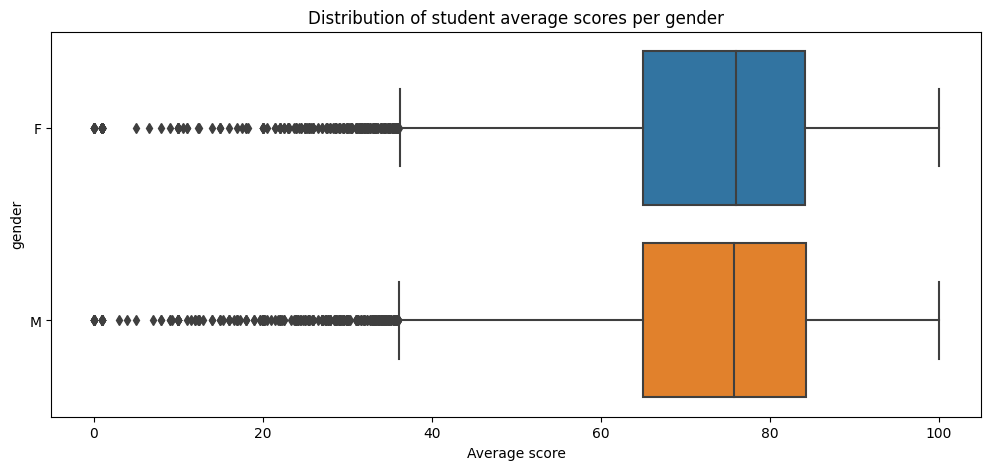

In [115]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title("Distribution of student average scores per gender")
sns.boxplot(data=student_average_scores, x='score', y='gender', ax=ax)
ax.set_xlabel("Average score");
plt.show()

In [116]:
final_results_per_gender = student_assessments_info[student_assessments_info['gender']!='Unknown'].groupby(['gender', 'final_result']).size().unstack()

# convert numbers to percentages
final_results_per_gender = round(final_results_per_gender.div(final_results_per_gender.sum(axis=1), axis=0), 4) * 100
fig = px.bar(final_results_per_gender, title="Final results per gender")
fig.show()

For now we can conclude that there is no big difference between the two genders' final results.

- IMD Band

Firstly, the imd_band values are in an unusable character format, we will convert them to a numerical scale.

In [117]:
student_assessments_info['imd_band'] = student_assessments_info['imd_band'].apply(lambda x: int(x[0])+1 if not x == "Missing" else x)

This way, instead of characters we will have a usable numerical scale from 1 to 10, 1 meaning 0-10% and 10 meaning 90 to 100%.

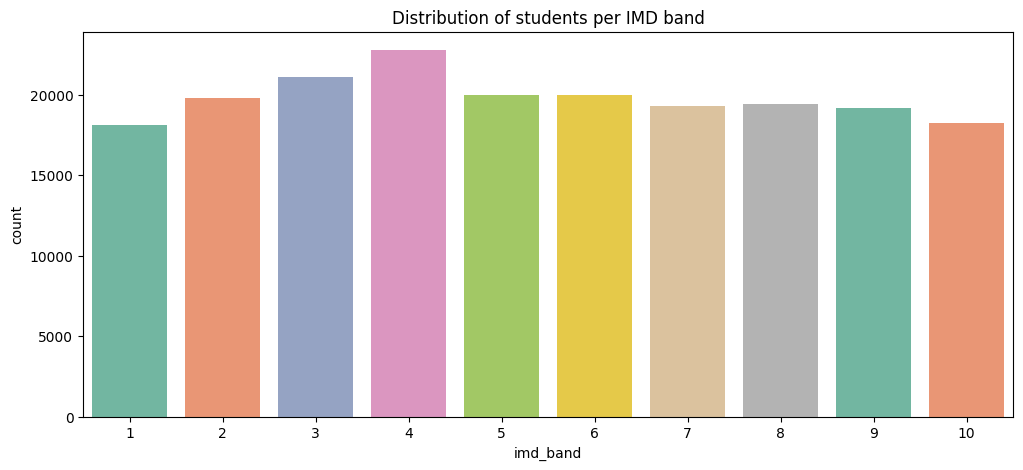

In [118]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title("Distribution of students per IMD band")
sns.countplot(data=student_assessments_info[student_assessments_info["imd_band"] != "Missing"].sort_values(by=["imd_band"]), x='imd_band', ax=ax, palette="Set2")
plt.show()

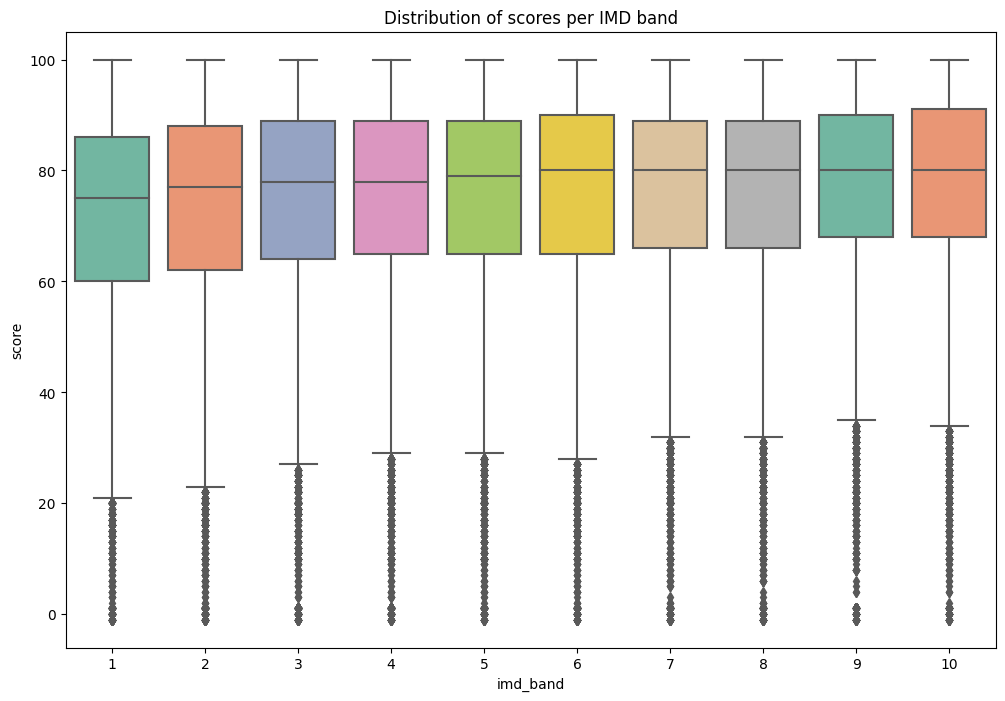

In [119]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Distribution of scores per IMD band")
sns.boxplot(data=student_assessments_info[student_assessments_info['imd_band'] != 'Missing'], x='imd_band', y='score', ax=ax, palette="Set2")
plt.show()

Here we can observe a slight positive correlation between imd_band and score.

In [120]:
final_results_per_imd = student_assessments_info.groupby(['imd_band', 'final_result']).size().unstack()

# convert numbers to percentages
final_results_per_imd = round(final_results_per_imd.div(final_results_per_imd.sum(axis=1), axis=0), 4) * 100
fig = px.bar(final_results_per_imd, title="Final results per IMD band")
fig.show()

We can see a higher percentage of students with a distinction on the higher imd_band levels, and a higher percentage of failed students on the lower levels.

- Region

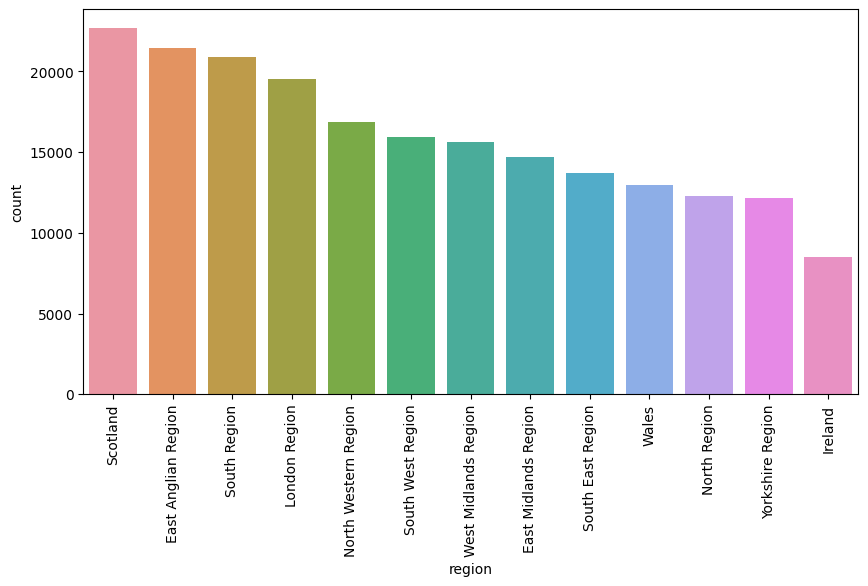

In [121]:
plt.figure(figsize=(10, 5))
sns.countplot(x='region', data=student_assessments_info, order=student_assessments_info['region'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [122]:
final_results_per_region = student_assessments_info.groupby(['region', 'final_result']).size().unstack()

# convert numbers to percentages
final_results_per_region = round(final_results_per_region.div(final_results_per_region.sum(axis=1), axis=0), 4) * 100
fig = px.bar(final_results_per_region, title="Final results per Region")
fig.show()

In [123]:
successful_students_per_region = student_assessments_info
successful_students_per_region['Success'] = successful_students_per_region['final_result'].apply(lambda x: 'Successful' if x in ['Pass', 'Distinction'] else 'Unsuccessful')
successful_students_per_region = successful_students_per_region.groupby(['region', 'Success']).size().unstack()

successful_students_per_region = round(successful_students_per_region.div(successful_students_per_region.sum(axis=1), axis=0), 4) * 100
successful_students_per_region.drop('Unsuccessful', axis=1, inplace=True)
successful_students_per_region.sort_values(by=['Successful'], ascending=False, inplace=True)
successful_students_per_region


Success,Successful
region,
North Region,76.13
South West Region,75.17
South East Region,74.92
South Region,74.56
Ireland,73.46
East Anglian Region,72.75
East Midlands Region,70.86
Yorkshire Region,70.75
Scotland,70.37


We can conclude from the data that the East Midlands region has the highest percentage of students who widthdraw. The North Western region has the highest percentage of failed students.

Ireland has the highest percentage of passed students, and the North Region has the highest percentage of students with a distinction.

If we look at the sum of "Passed" and "Distinction" as being "Successful" and the sum of being "Failed" or "Widthdrawn" as "Unsuccessful", then we can see that the North region is in the lead with 75% successful students and the North Western Region is at the bottom with 67% of successful students.

- Disability

Does disability have an impact on student performance?

(We probably can't use this data because it may be unethical but we are going to check it anyway)

Number of disabled students:  3164
Number of non-disabled students:  29429


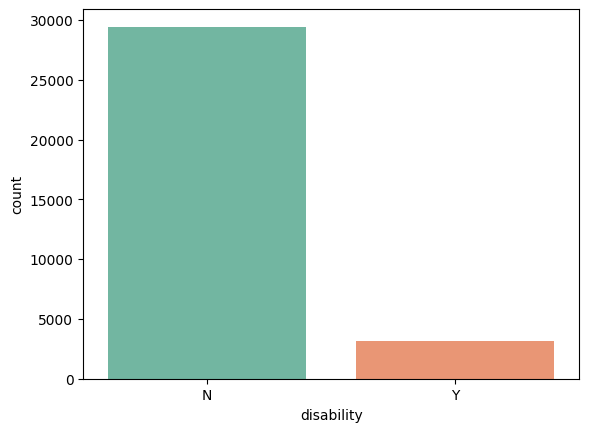

In [124]:
# look at student disability distribution
print('Number of disabled students: ', student_info_df[student_info_df['disability'] == 'Y'].shape[0])
print('Number of non-disabled students: ', student_info_df[student_info_df['disability'] == 'N'].shape[0])
sns.countplot(x="disability", data=student_info_df, palette="Set2");

In [125]:
final_result_disability = student_info_df.groupby(["disability", "final_result"]).size().unstack()
print(final_result_disability)

final_result  Distinction  Fail   Pass  Withdrawn
disability                                       
N                    2801  6340  11377       8911
Y                     223   712    984       1245


In [126]:
# convert numbers to percentages
final_result_disability = round(final_result_disability.div(final_result_disability.sum(axis=1), axis=0), 4) * 100
fig = px.bar(final_result_disability, title="Final results per disability")
fig.show()


We can see that people with a disabilty have a higher chance of not passing the course. They withdraw more and their fail percentage is a bit a higher than not disabled students.

- Highest education


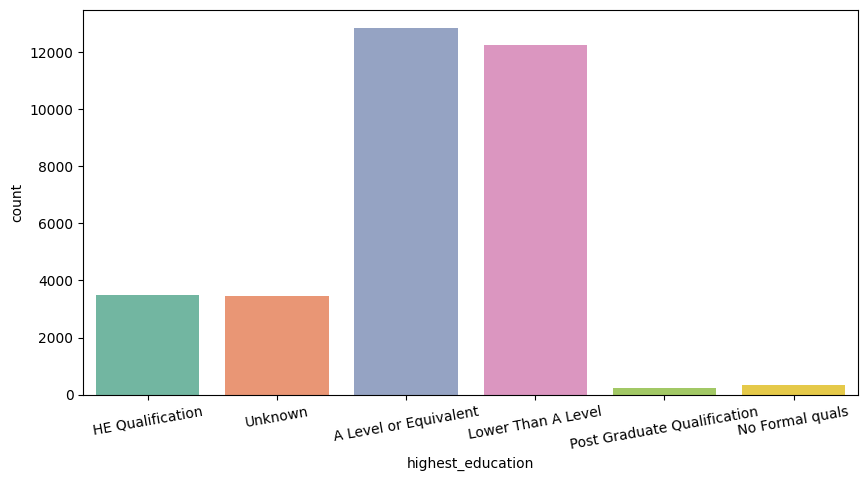

In [127]:
# Distribution of students per highest_education
plt.figure(figsize=(10,5))
plt.xticks(rotation=10)
sns.countplot(x='highest_education', data=student_info_df, palette="Set2");

In [128]:
final_result_education = student_info_df.groupby(["highest_education", "final_result"]).size().unstack()
final_result_education.head()

final_result,Distinction,Fail,Pass,Withdrawn
highest_education,,,,
A Level or Equivalent,1378,2426,5313,3726
HE Qualification,548,534,1439,976
Lower Than A Level,686,3130,4080,4352
No Formal quals,16,93,85,148
Post Graduate Qualification,68,17,85,47


In [129]:
final_result_education = round(final_result_education.div(final_result_education.sum(axis=1), axis=0), 4) * 100
fig = px.bar(final_result_education, title="Final results per education")
fig.show()

We can clearly see that highest education level has an impact on the succes of a student. Students with Post Graduate Qualification have a way higher distinction rate than the other educations.

We can see that Lower than A level and no formal quals have a lower pass rate than all the other educations.

- Age

Is there a difference between the students of different age bands?

0-35       20665
35-55       8298
Unknown     3446
55<=         184
Name: age_band, dtype: int64


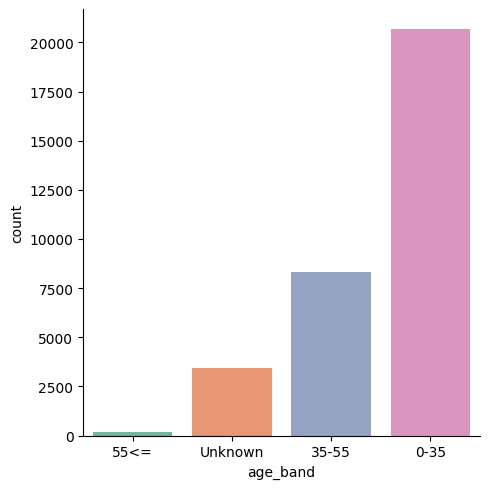

In [130]:
# look at student age distribution
print(student_info_df['age_band'].value_counts())
sns.catplot(x="age_band", kind="count", data=student_info_df, palette="Set2");

There is a huge difference in amount of students in each age_band, so the results of analyzing this data might be misleading

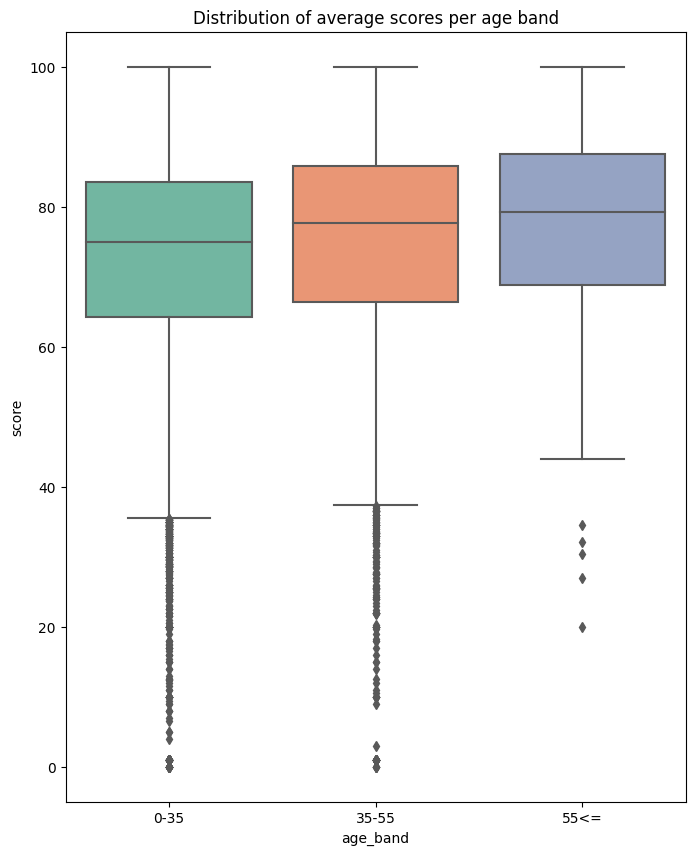

In [131]:
# Distribution of average scores per age_band
fig, ax = plt.subplots(figsize=(8, 10))
ax.set_title("Distribution of average scores per age band")
sns.boxplot(data=student_average_scores[student_average_scores['age_band'] != 'Unknown'], x='age_band', y='score', ax=ax, palette="Set2");

We can see that the older students in our data have a slightly higher average score.

- Studied credits

Does a student with less credits perform better?

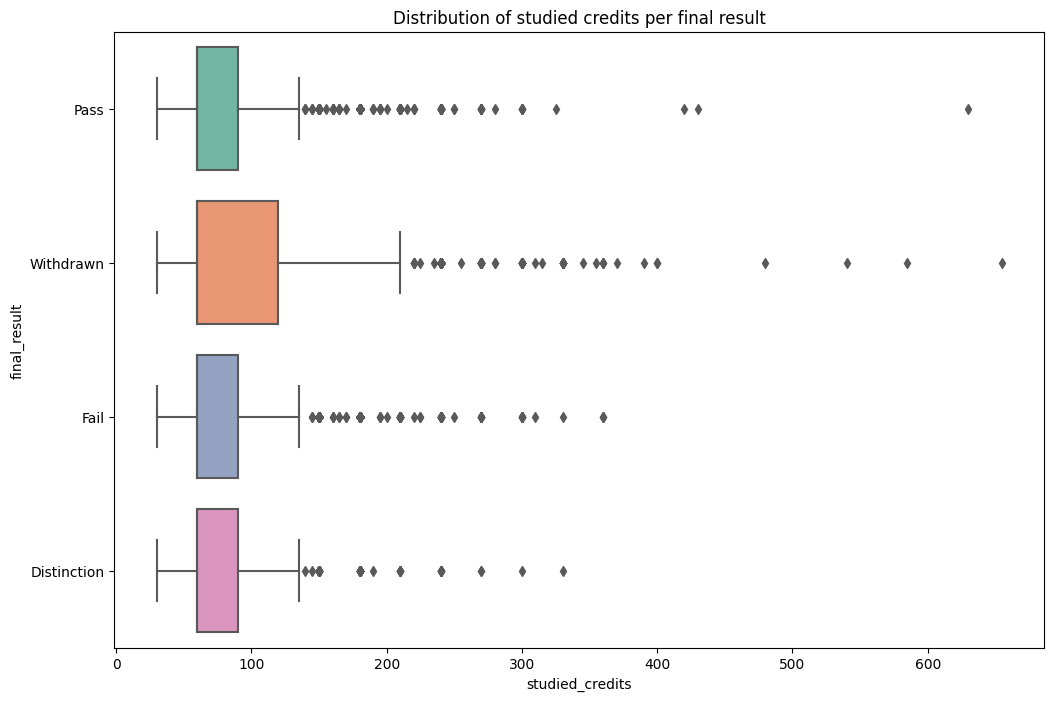

In [132]:
student_credits_info = student_info_df[student_info_df.columns[student_info_df.columns.isin(["id_student", "studied_credits", "final_result"])]]
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Distribution of studied credits per final result")
sns.boxplot(data=student_credits_info, x='studied_credits', y='final_result', ax=ax, palette="Set2");

Students who widthdrawn tend to have more study credits

In [133]:
student_attempted_tries = student_info_df[student_info_df.columns[student_info_df.columns.isin(["id_student", "num_of_prev_attempts", "final_result"])]]

# Distribution of attempted tries per final result
final_result_attempted_tries = student_attempted_tries.groupby(["num_of_prev_attempts", "final_result"]).size().unstack()
fig = px.bar(final_result_attempted_tries, title="Final results per number of previous attempts")
fig.show()


There are almost no students who have more than 3 previous attempts, so we will consider them outliers and delete them for now for simplicity.

In [134]:
# Drop rows where number_of_prev_attempts is higher than 3
final_result_attempted_tries = final_result_attempted_tries[final_result_attempted_tries.index <= 3]

In [135]:
# Convert to percentages
final_result_attempted_tries = round(final_result_attempted_tries.div(final_result_attempted_tries.sum(axis=1), axis=0), 4) * 100
fig = px.bar(final_result_attempted_tries, title="Final results per number of previous attempts")
fig.show()

We can see that when the number of attempts increases, the percentage of failed and withdrawn students also increases.

##### Explore student VLE

- Sum clicks

Does a higher amount of clicks result in higher scores?

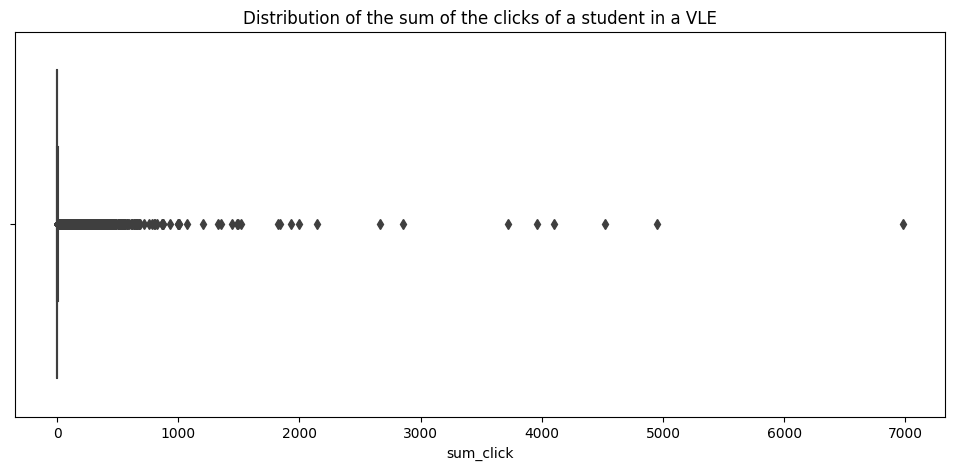

In [136]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title("Distribution of the sum of the clicks of a student in a VLE")
sns.boxplot(data=student_vle_df, x="sum_click");


In [137]:
student_vle_df["sum_click"].describe()

count   10,655,280.00
mean             3.72
std              8.85
min              1.00
25%              1.00
50%              2.00
75%              3.00
max          6,977.00
Name: sum_click, dtype: float64

From the boxplot and describe we can see that most people don't seem to interact much with the VLE (75% are at 3 clicks or less).

The extreme outliers here are a bit suspicious but it could be possible we would need further clarification.

Most people seem to be under 1000 clicks.

In [138]:
student_vle_df["sum_click"].value_counts()

1       5113910
2       1929023
3        965277
4        612858
5        415139
         ...   
340           1
401           1
3958          1
6977          1
1996          1
Name: sum_click, Length: 498, dtype: int64

Merge student VLE with student info

In [139]:
student_vle_info_df = pd.merge(student_vle_df, student_info_df, how="inner", on=["id_student"])
student_vle_info_df.head()

,code_module_x,code_presentation_x,id_student,id_site,date,sum_click,code_module_y,code_presentation_y,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,28400,546652,-10,4,Unknown,Unknown,Unknown,Scotland,Unknown,20-30%,Unknown,0,60,N,Pass
1,AAA,2013J,28400,546652,-10,1,Unknown,Unknown,Unknown,Scotland,Unknown,20-30%,Unknown,0,60,N,Pass
2,AAA,2013J,28400,546652,-10,1,Unknown,Unknown,Unknown,Scotland,Unknown,20-30%,Unknown,0,60,N,Pass
3,AAA,2013J,28400,546614,-10,11,Unknown,Unknown,Unknown,Scotland,Unknown,20-30%,Unknown,0,60,N,Pass
4,AAA,2013J,28400,546714,-10,1,Unknown,Unknown,Unknown,Scotland,Unknown,20-30%,Unknown,0,60,N,Pass


In [140]:
student_vle_mean = student_vle_info_df.groupby('final_result', as_index=False)['sum_click'].mean()
student_vle_mean

,final_result,sum_click
0,Distinction,3.88
1,Fail,3.52
2,Pass,3.75
3,Withdrawn,3.49


<AxesSubplot:xlabel='final_result', ylabel='sum_click'>

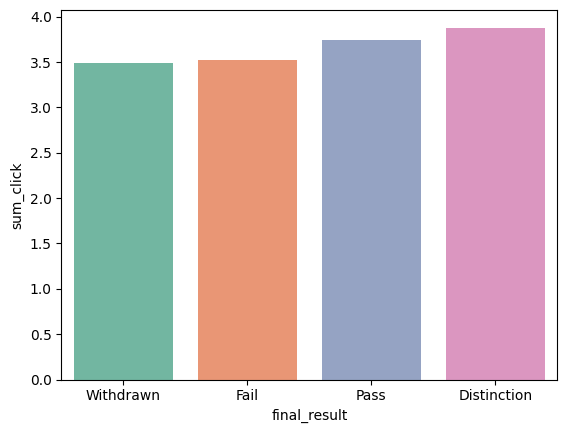

In [141]:
sns.barplot(data=student_vle_mean, x="final_result", y="sum_click", palette="Set2", order=["Withdrawn", "Fail", "Pass", "Distinction"])

We can see that student that have a higher average interaction rate with the VLE have a higher distinction and pass rate than students with lower average clicks.

Because we are unsure of what to do with the outliers we are going to look at the score of the student with 7000 clicks.

Looking at that student might clear up whether or not it is a mistake or not.

In [142]:
top_10_clicks = student_vle_info_df.sort_values(by=["sum_click"], ascending=False).head(10)
top_10_clicks

,code_module_x,code_presentation_x,id_student,id_site,date,sum_click,code_module_y,code_presentation_y,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
6810912,DDD,2013J,204505,673519,43,6977,DDD,2013J,M,North Western Region,HE Qualification,40-50%,0-35,0,60,N,Pass
7589204,DDD,2014J,592214,814061,121,4953,DDD,2014J,F,South Region,A Level or Equivalent,80-90%,0-35,0,60,N,Pass
2512428,EEE,2013J,601224,551135,87,4523,Unknown,Unknown,Unknown,Scotland,Unknown,90-100%,Unknown,0,90,N,Pass
2512429,EEE,2013J,601224,551135,87,4523,Unknown,Unknown,Unknown,Scotland,Unknown,90-100%,Unknown,0,90,N,Pass
9256950,FFF,2013B,497180,526721,1,4098,FFF,2013B,M,East Anglian Region,Lower Than A Level,20-30%,0-35,0,120,N,Pass
7391218,DDD,2014B,620337,773028,35,3958,DDD,2014B,F,East Anglian Region,HE Qualification,30-40%,35-55,0,120,N,Fail
7391219,DDD,2014B,620337,773028,35,3958,FFF,2014B,F,East Anglian Region,HE Qualification,30-40%,35-55,0,120,N,Withdrawn
8940445,FFF,2013B,543643,526853,140,3725,FFF,2013B,F,South Region,A Level or Equivalent,20-30%,0-35,0,60,Y,Pass
4963774,CCC,2014J,649840,909032,109,2853,EEE,2014J,M,South Region,Lower Than A Level,40-50%,0-35,0,90,N,Withdrawn
4963773,CCC,2014J,649840,909032,109,2853,CCC,2014J,M,South Region,Lower Than A Level,40-50%,0-35,0,90,N,Pass


In [143]:
top_10_clicks["final_result"].value_counts()

Pass         7
Withdrawn    2
Fail         1
Name: final_result, dtype: int64

If we look at the top 10 most clicks 7 of them actually pass, so they might not be outliers.

But with that amount of clicks it is weird that not everyone passes.

In [144]:
# Drop all the rows where sum_click is higher than 100
student_vle_info_outliers_dropped = student_vle_info_df.drop(student_vle_info_df[student_vle_info_df["sum_click"] >= 100].index)
student_vle_info_outliers_dropped.head()

,code_module_x,code_presentation_x,id_student,id_site,date,sum_click,code_module_y,code_presentation_y,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,28400,546652,-10,4,Unknown,Unknown,Unknown,Scotland,Unknown,20-30%,Unknown,0,60,N,Pass
1,AAA,2013J,28400,546652,-10,1,Unknown,Unknown,Unknown,Scotland,Unknown,20-30%,Unknown,0,60,N,Pass
2,AAA,2013J,28400,546652,-10,1,Unknown,Unknown,Unknown,Scotland,Unknown,20-30%,Unknown,0,60,N,Pass
3,AAA,2013J,28400,546614,-10,11,Unknown,Unknown,Unknown,Scotland,Unknown,20-30%,Unknown,0,60,N,Pass
4,AAA,2013J,28400,546714,-10,1,Unknown,Unknown,Unknown,Scotland,Unknown,20-30%,Unknown,0,60,N,Pass


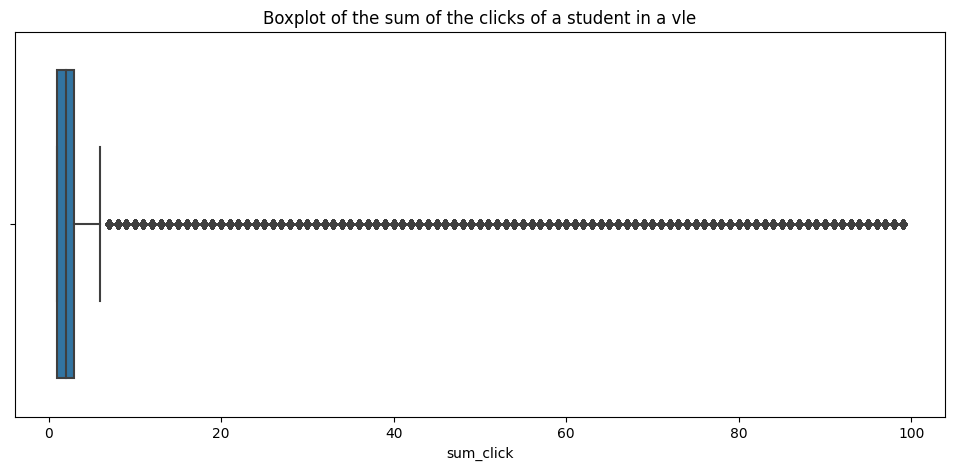

In [145]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title("Boxplot of the sum of the clicks of a student in a vle")
sns.boxplot(data=student_vle_info_outliers_dropped, x="sum_click");

In [146]:
student_vle_info_outliers_dropped_mean = student_vle_info_outliers_dropped.groupby('final_result', as_index=False)['sum_click'].mean()
student_vle_info_outliers_dropped_mean

,final_result,sum_click
0,Distinction,3.78
1,Fail,3.40
2,Pass,3.64
3,Withdrawn,3.39


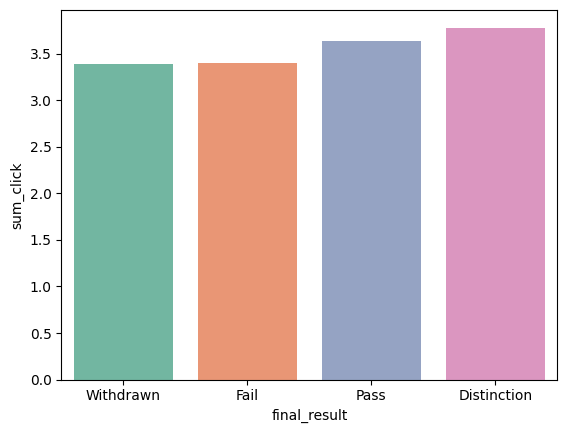

In [147]:
sns.barplot(data=student_vle_info_outliers_dropped_mean, x="final_result", y="sum_click", palette="Set2", order=["Withdrawn", "Fail", "Pass", "Distinction"]);

Even if we drop a large part of the outliers the relation between them stays very similar, so the outliers don't really seem to change the conclusion about more clicks lead to a higher succes chance.

##### Explore assessment types

In [148]:
assessments_info_scores = pd.merge(student_assessment_df, assessments_df, on=["id_assessment"])
assessments_info_scores.head()

assessments_info_scores.groupby('assessment_type', as_index=False)['score'].mean()

,assessment_type,score
0,CMA,81.03
1,Exam,65.57
2,TMA,72.43


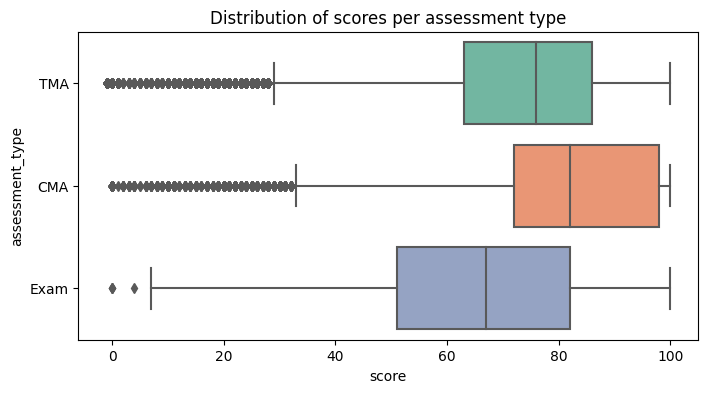

In [72]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("Distribution of scores per assessment type")
sns.boxplot(data=assessments_info_scores, x="score", y="assessment_type", palette="Set2");

Students seem to do the worst at exams

# Assignment 3

In [149]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

## Does the disablity of a student contribute to the failure in a course?

In [254]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

# split the data set student_vle_info_df into training and test set with a 60 to 40 ratio with x being the final_result and y being the sum_clicks
y = student_vle_info_df[['final_result']]
# convert pass to 0 and fail to 1 and withdrawn to 2 and distinction to 3
y = y.replace(['Pass', 'Fail', 'Withdrawn', 'Distinction'], [0, 1, 2, 3])

x = student_vle_info_df.drop(['final_result'], axis=1)

# convert the categorical data to numerical data
le = LabelEncoder()
x = x.apply(le.fit_transform)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)


# Create a LinearRegression model and fit it to the data
model = LinearRegression()

model.fit(x_train, y_train)

# Print the coefficients of the model
print(model.coef_)

[[ 6.70177140e-02  3.07646601e-02  5.27927861e-06  8.51794561e-06
  -1.00932923e-03  2.90866830e-04 -7.13113110e-02  3.27704026e-02
   4.38737784e-02  5.12004624e-04 -2.50541814e-02  1.76913752e-02
   9.10140941e-02 -5.42004391e-02  8.48132785e-03  1.18443707e-01]]
